<a href="https://colab.research.google.com/github/LoganK64/Address-Book/blob/master/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Christopher Plummer
#### Logan Keim
#### Joel Karumathy
#### CSCE-489-502
#### Prof. Carlisle
#### 11/15/2021


In [ ]:
import csv
import math
import torch
import numpy as np
import statistics as stat
from matplotlib import pyplot as plt

# Mount Drive Folder
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/Shareddrives/Data Analytics for Cyber Project"

# Use GPU to help speed up calculations if available
# DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/Shareddrives/Data Analytics for Cyber Project
Found GPU at: /device:GPU:0


**PARSE DATASET**

In [ ]:
phishing_features    = []
nonphishing_features = []
phish   = []
train_x = []
train_y = []
test_x  = []
test_y  = []

In [ ]:
# Put phishing dataset features into array.
# All Y values for this dataset are true (because each email is phishing)
with open('phishing.csv', mode = 'r') as file:
    csvFile = csv.reader(file)
    next(csvFile)
    for line in csvFile:
      phishing_features.append(line[1:12])
      phish.append(1)

# Put non-phishing dataset features into array.
# All Y values for this dataset are false
with open('nonPhishing.csv', mode = 'r') as file:
    csvFile = csv.reader(file)
    next(csvFile)
    for line in csvFile:
      nonphishing_features.append(line[1:12])
      phish.append(0)

**TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
dataset = phishing_features + nonphishing_features
train_x, test_x, train_y, test_y = train_test_split(dataset, phish, random_state=42)

**RANDOM FORREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators = 100)
def rfc_fit():
  with tf.device('/device:GPU:0'):
    rfcModel.fit(train_x,train_y)

rfc_fit()

**RFC CONFUSION MATRIX / CLASSIFICATION REPORT**

--- RFC Confusion Matrix ---
[[677   3]
 [ 14 355]]


--- RFC Results ---
True  Negatives  : 677
False Positives  : 3
False Negatives  : 14
True  Positives  : 355
False Positive Rate  :  0.004411764705882353
False Negative Rate  :  0.037940379403794036

--- RFC Classification Report  ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       680
           1       0.99      0.96      0.98       369

    accuracy                           0.98      1049
   macro avg       0.99      0.98      0.98      1049
weighted avg       0.98      0.98      0.98      1049




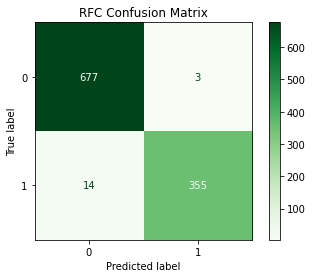

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("--- RFC Confusion Matrix ---")
ypredRFC = rfcModel.predict(test_x)
confused=confusion_matrix(test_y, ypredRFC)

matrixImg = ConfusionMatrixDisplay.from_estimator(
    rfcModel,
    test_x,
    test_y,
    cmap=plt.cm.Greens,
)
matrixImg.ax_.set_title("RFC Confusion Matrix")
print(matrixImg.confusion_matrix)
print()

print()
print("--- RFC Results ---")
print("True  Negatives  : " + str(confused[0][0]))
print("False Positives  : " + str(confused[0][1]))
print("False Negatives  : " + str(confused[1][0]))
print("True  Positives  : " + str(confused[1][1]))
print("False Positive Rate  : ", confused[0][1]/(confused[0][1]+confused[0][0]))
print("False Negative Rate  : ", confused[1][0]/(confused[1][0]+confused[1][1]))

print()
print("--- RFC Classification Report  ---")
print(metrics.classification_report(test_y, ypredRFC))
print()

# tn, fp, fn, tp = confused.ravel()
# print("| TN: ", tn, "| FP: ", fp , "| FN: ", fn, "| TP: ", tp, "|")


In [ ]:
from sklearn.model_selection import cross_val_score

def rfc_scores():
  with tf.device('/device:GPU:0'):
    scores = cross_val_score(rfcModel, train_x, train_y, cv = 20, scoring='precision')
    print("20-Fold: Mean:", scores.mean(), " Std Dev:", scores.std())

    scores = cross_val_score(rfcModel, train_x, train_y, cv = 10, scoring='accuracy')
    print("10-Fold: Mean:", scores.mean(), " Std Dev:", scores.std())

    scores = cross_val_score(rfcModel, train_x, train_y, cv = 5, scoring='precision')
    print("5-Fold: Mean:", scores.mean(), " Std Dev:", scores.std())

    scores = cross_val_score(rfcModel, train_x, train_y, scoring='precision')
    print("No Cross Validation: Mean:", scores.mean(), " Std Dev:", scores.std())

rfc_scores()

20-Fold: Mean: 0.978850307374566  Std Dev: 0.022117099276346728
10-Fold: Mean: 0.9809362046304722  Std Dev: 0.008159688024582943
5-Fold: Mean: 0.9802164291341938  Std Dev: 0.0029997859316823754
No Cross Validation: Mean: 0.978312397041212  Std Dev: 0.0036630722216674763


**Support Vector Machine Classifier**



In [ ]:
from sklearn.svm import SVC
svmModel = SVC(kernel='linear', C=1E2, probability=True)
def svm_fit():
  with tf.device('/device:GPU:0'):
    svmModel.fit(train_x, train_y)

svm_fit()

**SVM CONFUSION MATRIX / CLASSIFICATION REPORT**

--- Linear SVC Confusion Matrix ---
[[673   7]
 [ 13 356]]

--- Linear SVC Results ---
True  Negatives  : 673
False Positives  : 7
False Negatives  : 13
True  Positives  : 356
False Positive Rate  :  0.010294117647058823
False Negative Rate  :  0.03523035230352303

--- Linear SVC Classification Report  ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       680
           1       0.98      0.96      0.97       369

    accuracy                           0.98      1049
   macro avg       0.98      0.98      0.98      1049
weighted avg       0.98      0.98      0.98      1049




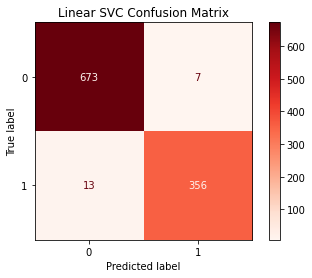

In [ ]:
print("--- Linear SVC Confusion Matrix ---")
ypredSVM = svmModel.predict(test_x)
confused=confusion_matrix(test_y, ypredSVM)

matrixImg = ConfusionMatrixDisplay.from_estimator(
    svmModel,
    test_x,
    test_y,
    cmap=plt.cm.Reds,
)
matrixImg.ax_.set_title("Linear SVC Confusion Matrix")
print(matrixImg.confusion_matrix)
print()

print("--- Linear SVC Results ---")
print("True  Negatives  : " + str(confused[0][0]))
print("False Positives  : " + str(confused[0][1]))
print("False Negatives  : " + str(confused[1][0]))
print("True  Positives  : " + str(confused[1][1]))
print("False Positive Rate  : ", confused[0][1]/(confused[0][1]+confused[0][0]))
print("False Negative Rate  : ", confused[1][0]/(confused[1][0]+confused[1][1]))

print()
print("--- Linear SVC Classification Report  ---")
print(metrics.classification_report(test_y, ypredSVM))
print()

#tn, fp, fn, tp = confused.ravel()
#print("| TN: ", tn, "| FP: ", fp , "| FN: ", fn, "| TP: ", tp, "|")

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naiveBayesModel = GaussianNB()
def nb_fit():
  with tf.device('/device:GPU:0'):
    naiveBayesModel.fit(train_x, train_y)

nb_fit()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:968: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


**Naive Bayes CONFUSION MATRIX / CLASSIFICATION REPORT**

--- Naive Bayes Confusion Matrix ---
[[668  12]
 [ 65 304]]

--- Naive Bayes Results ---
True  Negatives  : 668
False Positives  : 12
False Negatives  : 65
True  Positives  : 304
False Positive Rate  :  0.01764705882352941
False Negative Rate  :  0.17615176151761516

--- Naive Bayes Report  ---
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       680
           1       0.96      0.82      0.89       369

    accuracy                           0.93      1049
   macro avg       0.94      0.90      0.92      1049
weighted avg       0.93      0.93      0.93      1049




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


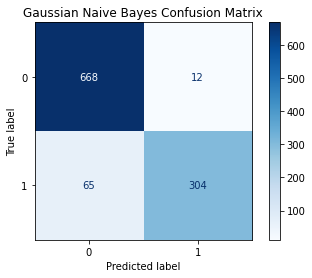

In [ ]:
print("--- Naive Bayes Confusion Matrix ---")
ypredNB = naiveBayesModel.predict(test_x)
naiveBayesConfused = confusion_matrix(test_y, ypredNB)

matrixImg = ConfusionMatrixDisplay.from_estimator(
    naiveBayesModel,
    test_x,
    test_y,
    cmap=plt.cm.Blues,
)
matrixImg.ax_.set_title("Gaussian Naive Bayes Confusion Matrix")
print(matrixImg.confusion_matrix)
print()

print("--- Naive Bayes Results ---")
print("True  Negatives  : " + str(naiveBayesConfused[0][0]))
print("False Positives  : " + str(naiveBayesConfused[0][1]))
print("False Negatives  : " + str(naiveBayesConfused[1][0]))
print("True  Positives  : " + str(naiveBayesConfused[1][1]))
print("False Positive Rate  : ", naiveBayesConfused[0][1]/(naiveBayesConfused[0][1]+naiveBayesConfused[0][0]))
print("False Negative Rate  : ", naiveBayesConfused[1][0]/(naiveBayesConfused[1][0]+naiveBayesConfused[1][1]))

print()
print("--- Naive Bayes Report  ---")
print(metrics.classification_report(test_y, ypredNB))
print()

# tn, fp, fn, tp = naiveBayesConfused.ravel()
# print("| TN: ", tn, "| FP: ", fp , "| FN: ", fn, "| TP: ", tp, "|")

**Kth Nearest Neighbor Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kthModel = KNeighborsClassifier(n_neighbors=5)
def knn_fit():
  with tf.device('/device:GPU:0'):
    kthModel.fit(train_x, train_y)

knn_fit()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:968: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


**Kth Nearest Neighbor CONFUSION MATRIX / CLASSIFICATION REPORT**

--- Kth Nearest Neighbor Confusion Matrix ---
[[675   5]
 [ 19 350]]

--- Kth Nearest Neighbor Results ---
True  Negatives  : 675
False Positives  : 5
False Negatives  : 19
True  Positives  : 350
False Positive Rate  :  0.007352941176470588
False Negative Rate  :  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


0.051490514905149054

--- Kth Nearest Neighbor Report  ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       680
           1       0.99      0.95      0.97       369

    accuracy                           0.98      1049
   macro avg       0.98      0.97      0.97      1049
weighted avg       0.98      0.98      0.98      1049




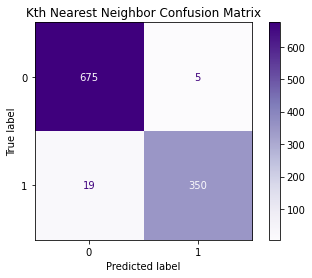

In [ ]:
print("--- Kth Nearest Neighbor Confusion Matrix ---")
ypredKNN = kthModel.predict(test_x)
kthConfused = confusion_matrix(test_y, ypredKNN)

matrixImg = ConfusionMatrixDisplay.from_estimator(
    kthModel,
    test_x,
    test_y,
    cmap=plt.cm.Purples,
)
matrixImg.ax_.set_title("Kth Nearest Neighbor Confusion Matrix")
print(matrixImg.confusion_matrix)
print()

print("--- Kth Nearest Neighbor Results ---")
print("True  Negatives  : " + str(kthConfused[0][0]))
print("False Positives  : " + str(kthConfused[0][1]))
print("False Negatives  : " + str(kthConfused[1][0]))
print("True  Positives  : " + str(kthConfused[1][1]))
print("False Positive Rate  : ", kthConfused[0][1]/(kthConfused[0][1]+kthConfused[0][0]))
print("False Negative Rate  : ", kthConfused[1][0]/(kthConfused[1][0]+kthConfused[1][1]))

print()
print("--- Kth Nearest Neighbor Report  ---")
print(metrics.classification_report(test_y, ypredKNN))
print()

# tn, fp, fn, tp = kthConfused.ravel()
# print("| TN: ", tn, "| FP: ", fp , "| FN: ", fn, "| TP: ", tp, "|")

**ROC CURVES**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


rfc_auc 0.9788239279451618
svm_auc 0.977237765024709
naiveBayes_auc 0.9031005898294278
kth_auc 0.9705782719591902


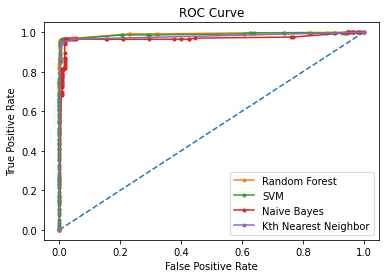

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

rfc_yProb = rfcModel.predict_proba(test_x)
svm_yProb = svmModel.predict_proba(test_x)
nb_yProb  = naiveBayesModel.predict_proba(test_x)
kth_yProb = kthModel.predict_proba(test_x)

rfc_auc = roc_auc_score(test_y, ypredRFC)
svm_auc = roc_auc_score(test_y, ypredSVM)
naiveBayes_auc = roc_auc_score(test_y, ypredNB)
kth_auc = roc_auc_score(test_y, ypredKNN)

print("rfc_auc", rfc_auc)
print("svm_auc", svm_auc)
print("naiveBayes_auc", naiveBayes_auc)
print("kth_auc", kth_auc)


rfc_fpr, rfc_tpr , _ = roc_curve(test_y, rfc_yProb[:,1])
svm_fpr, svm_tpr , _ = roc_curve(test_y, svm_yProb[:,1])
naiveBayes_fpr, naiveBayes_tpr , _ = roc_curve(test_y, nb_yProb[:,1])
kth_fpr, kth_tpr , _ = roc_curve(test_y, kth_yProb[:,1])
ns_probs = [0 for _ in range(len(test_y))]
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(rfc_fpr, rfc_tpr, marker='.',label = "Random Forest")
pyplot.plot(svm_fpr, svm_tpr, marker='.',label = "SVM")
pyplot.plot(naiveBayes_fpr, naiveBayes_tpr, marker='.',label = "Naive Bayes")
pyplot.plot(kth_fpr, kth_tpr, marker='.',label = "Kth Nearest Neighbor")

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("ROC Curve")

pyplot.legend()

pyplot.show()

In [ ]:
def cross_scores():
  with tf.device('/device:GPU:0'):
    scores = cross_val_score(rfcModel, train_x, train_y, cv = 10, scoring='accuracy')
    print("RFC 10-Fold: Mean:", scores.mean(), " Std Dev:", scores.std())

    scores = cross_val_score(svmModel, train_x, train_y, cv = 10, scoring='accuracy')
    print("SVM 10-Fold: Mean:", scores.mean(), " Std Dev:", scores.std())

    scores = cross_val_score(naiveBayesModel, train_x, train_y, cv = 10, scoring='accuracy')
    print("Naive Bayes: 10-Fold: Mean:", scores.mean(), " Std Dev:", scores.std())

    scores = cross_val_score(kthModel, train_x, train_y, cv = 10, scoring='accuracy')
    print("10-Fold: Mean:", scores.mean(), " Std Dev:", scores.std())

cross_scores()

RFC 10-Fold: Mean: 0.9815721362855122  Std Dev: 0.006927142224132144
SVM 10-Fold: Mean: 0.9777575573753918  Std Dev: 0.009740465023163473


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:968: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:968: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estim

Naive Bayes: 10-Fold: Mean: 0.9396178343949046  Std Dev: 0.012173337366502085
10-Fold: Mean: 0.977125669800829  Std Dev: 0.007346565366099592


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:968: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:968: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estim